In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load the dataset
data = pd.read_csv('/kaggle/input/ensemble-dataset/Dataset_Ensemble_learning.csv')
data.head()

,Course name,Recommended by how many people,Reasons for choosing,Job opportunities,Course fee (INR),Course duration (months),Course Decision
0,B.Sc Physics,4,Strong research opportunities,3,40000,12,0
1,B.A. Journalism,3,Strong writing skills,3,50000,12,0
2,B.Tech Computer Science,5,High demand in IT Sector,5,60000,36,1
3,B.Tech Mechanical,5,High scope,4,40000,36,0
4,B.Com,4,Commerce background,3,55000,24,1


In [18]:
# Step 2: Preprocess the data
X = data.drop(columns=["Course Decision","Reasons for choosing","Course name"])  # Features
y = data["Course Decision"]  # Target variable


In [19]:
# Step 3: Train a decision tree model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
# Step 4: Extract feature importances
feature_importances = clf.feature_importances_

# Step 5: Rank the attributes
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
})

sorted_features = feature_importance_df.sort_values(by="Importance", ascending=False)

In [21]:
# Step 6: Select attributes for the decision tree
top_attributes = sorted_features["Feature"].tolist()

print("Top attributes for the decision tree:")
for idx, attribute in enumerate(top_attributes, start=1):
    print(f"{idx}. {attribute}")

Top attributes for the decision tree:
1. Recommended by how many people
2. Job opportunities
3. Course fee (INR)
4. Course duration (months)


## Random Forest with n_estimators as 10

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Step 7: Train a Random Forest model with 10 trees
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [23]:
# Step 8: Predictions on the test set for each decision tree
predictions_per_tree = []
for tree_idx, tree in enumerate(rf_clf.estimators_, start=1):
    tree_pred = tree.predict(X_test)
    predictions_per_tree.append(tree_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without

In [24]:
# Step 9: Combine predictions of all trees (voting) to get final prediction
final_predictions = rf_clf.predict(X_test)

# Step 10: Organize predictions in a matrix format
all_predictions_matrix = np.array(predictions_per_tree).T

# Step 11: Print predictions for each sample next to each other
print("Predictions for each sample by each decision tree and final prediction:")
for sample_idx in range(len(X_test)):
    sample_predictions = all_predictions_matrix[sample_idx]
    actual_value = y_test.iloc[sample_idx]
    final_prediction = final_predictions[sample_idx]
    print(f"Sample {sample_idx+1} - Actual: {actual_value}, Predictions: {sample_predictions}, Final Prediction: {final_prediction}")

# Step 12: Accuracy of the model
accuracy = accuracy_score(y_test, final_predictions)
print(f"\nAccuracy of Random Forest: {accuracy:.2f}")

Predictions for each sample by each decision tree and final prediction:
Sample 1 - Actual: 1, Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], Final Prediction: 1
Sample 2 - Actual: 1, Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], Final Prediction: 1
Sample 3 - Actual: 0, Predictions: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], Final Prediction: 0
Sample 4 - Actual: 1, Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Final Prediction: 0
Sample 5 - Actual: 0, Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Final Prediction: 0
Sample 6 - Actual: 1, Predictions: [1. 0. 1. 1. 1. 1. 1. 1. 1. 1.], Final Prediction: 1
Sample 7 - Actual: 1, Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], Final Prediction: 1
Sample 8 - Actual: 1, Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Final Prediction: 0
Sample 9 - Actual: 0, Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], Final Prediction: 0
Sample 10 - Actual: 1, Predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.], Final Prediction: 1
Sample 11 - Actual: 0, Predictions: [0. 0. 0. 0


Decision Tree 1:


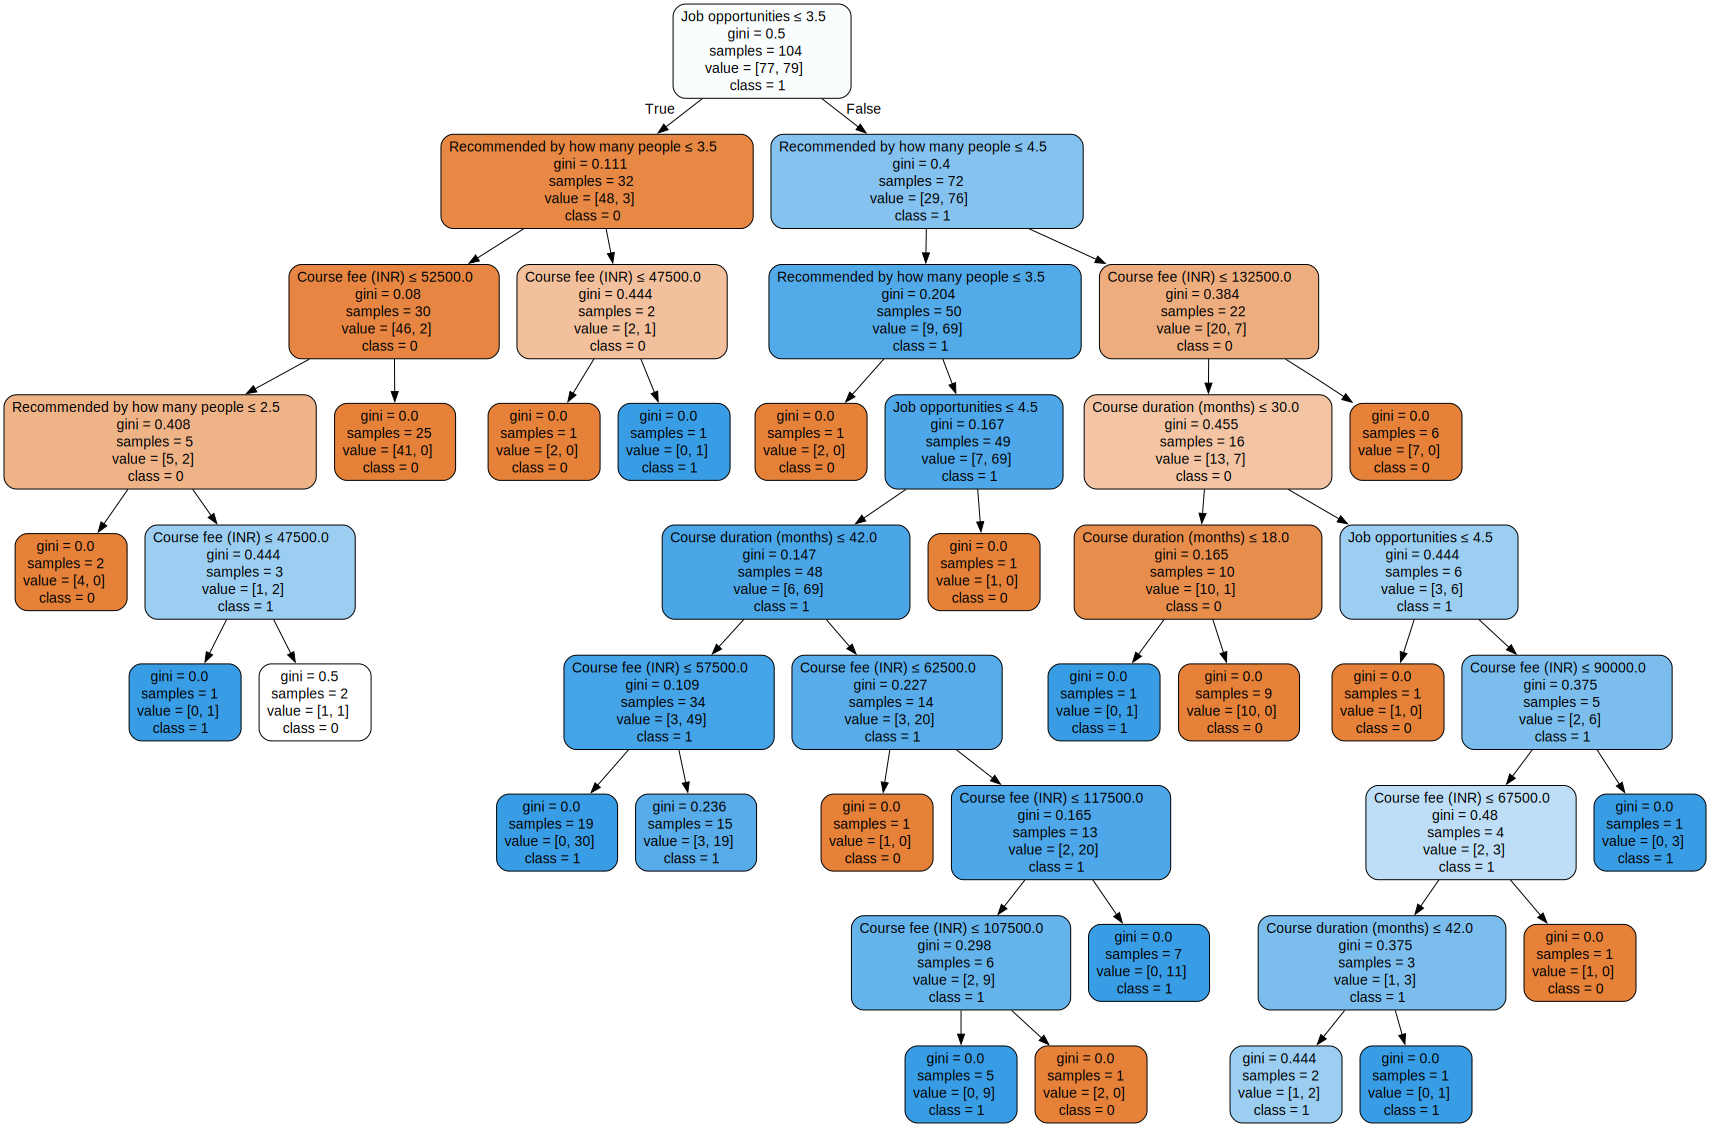


Decision Tree 2:


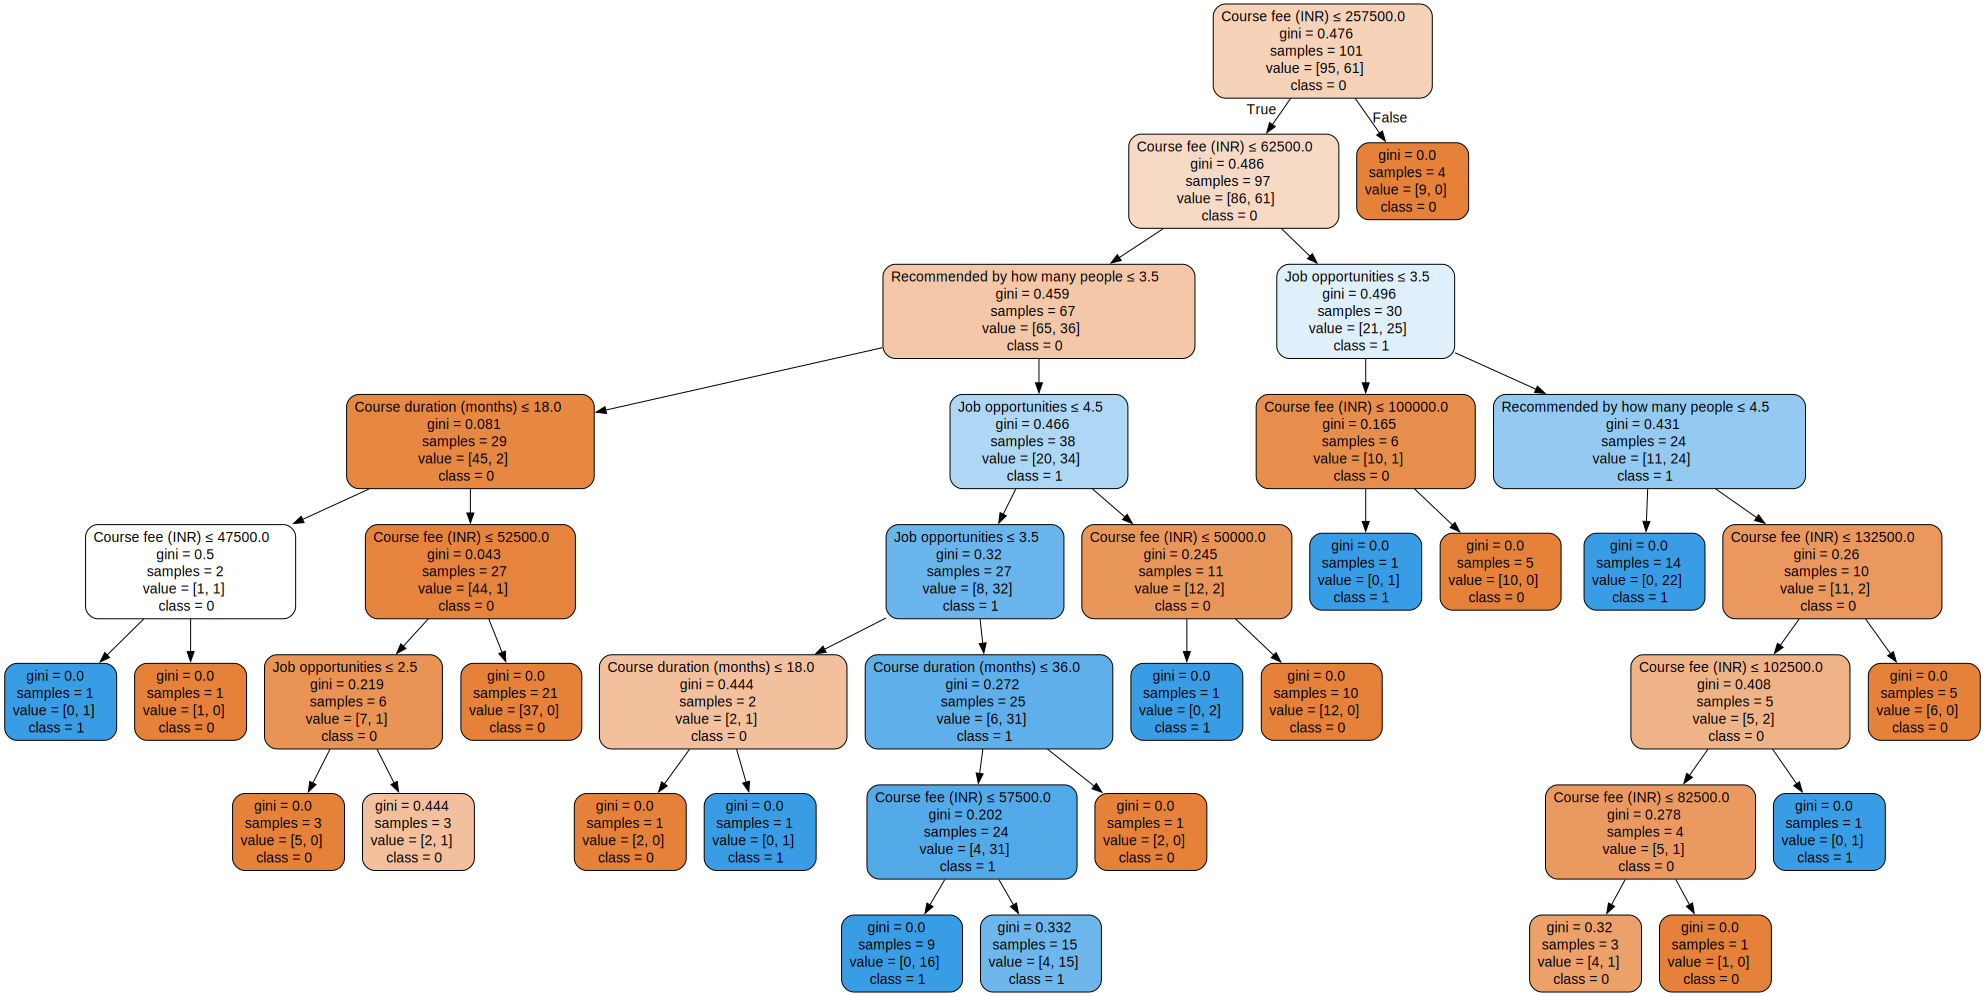


Decision Tree 3:


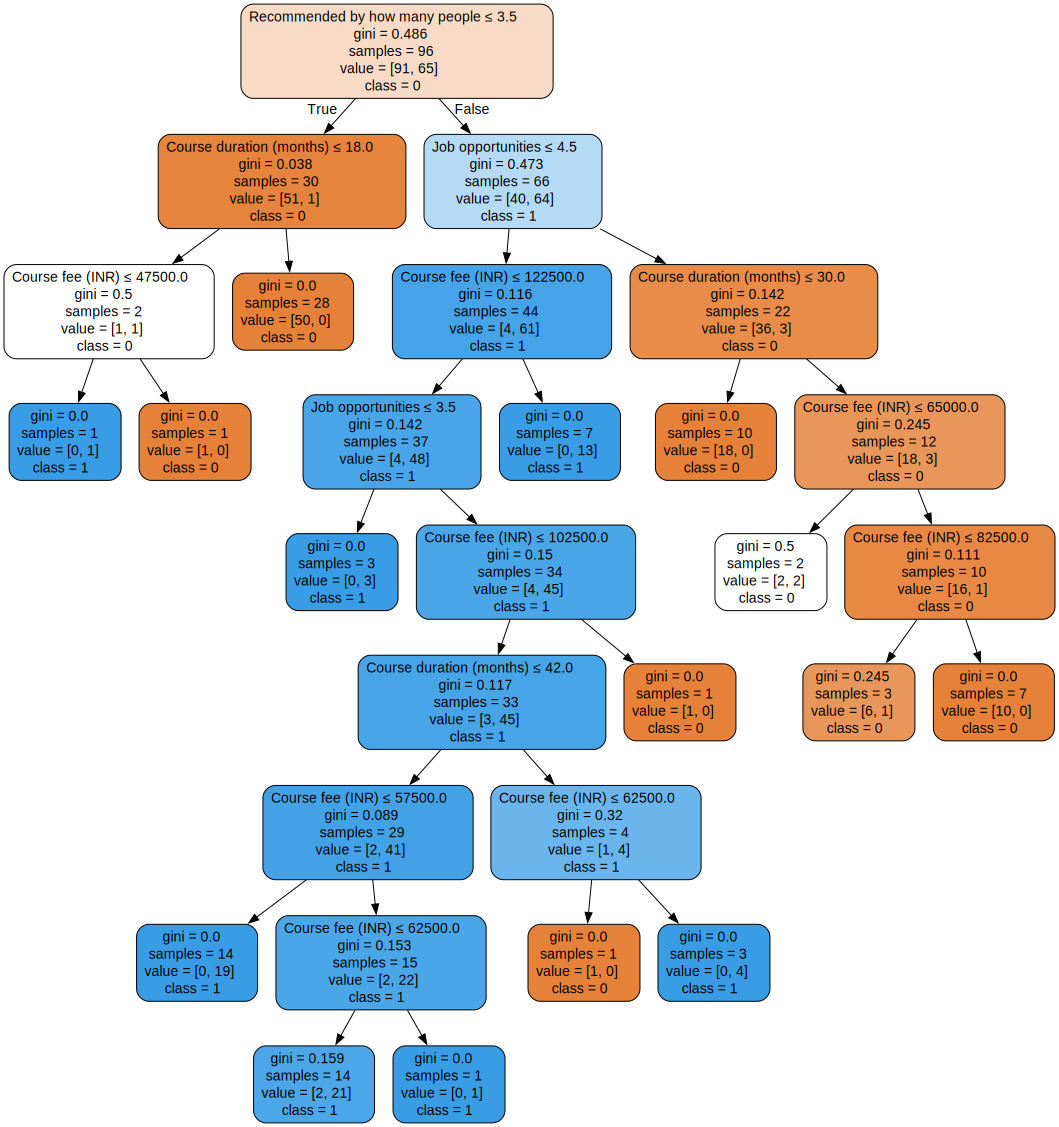


Decision Tree 4:


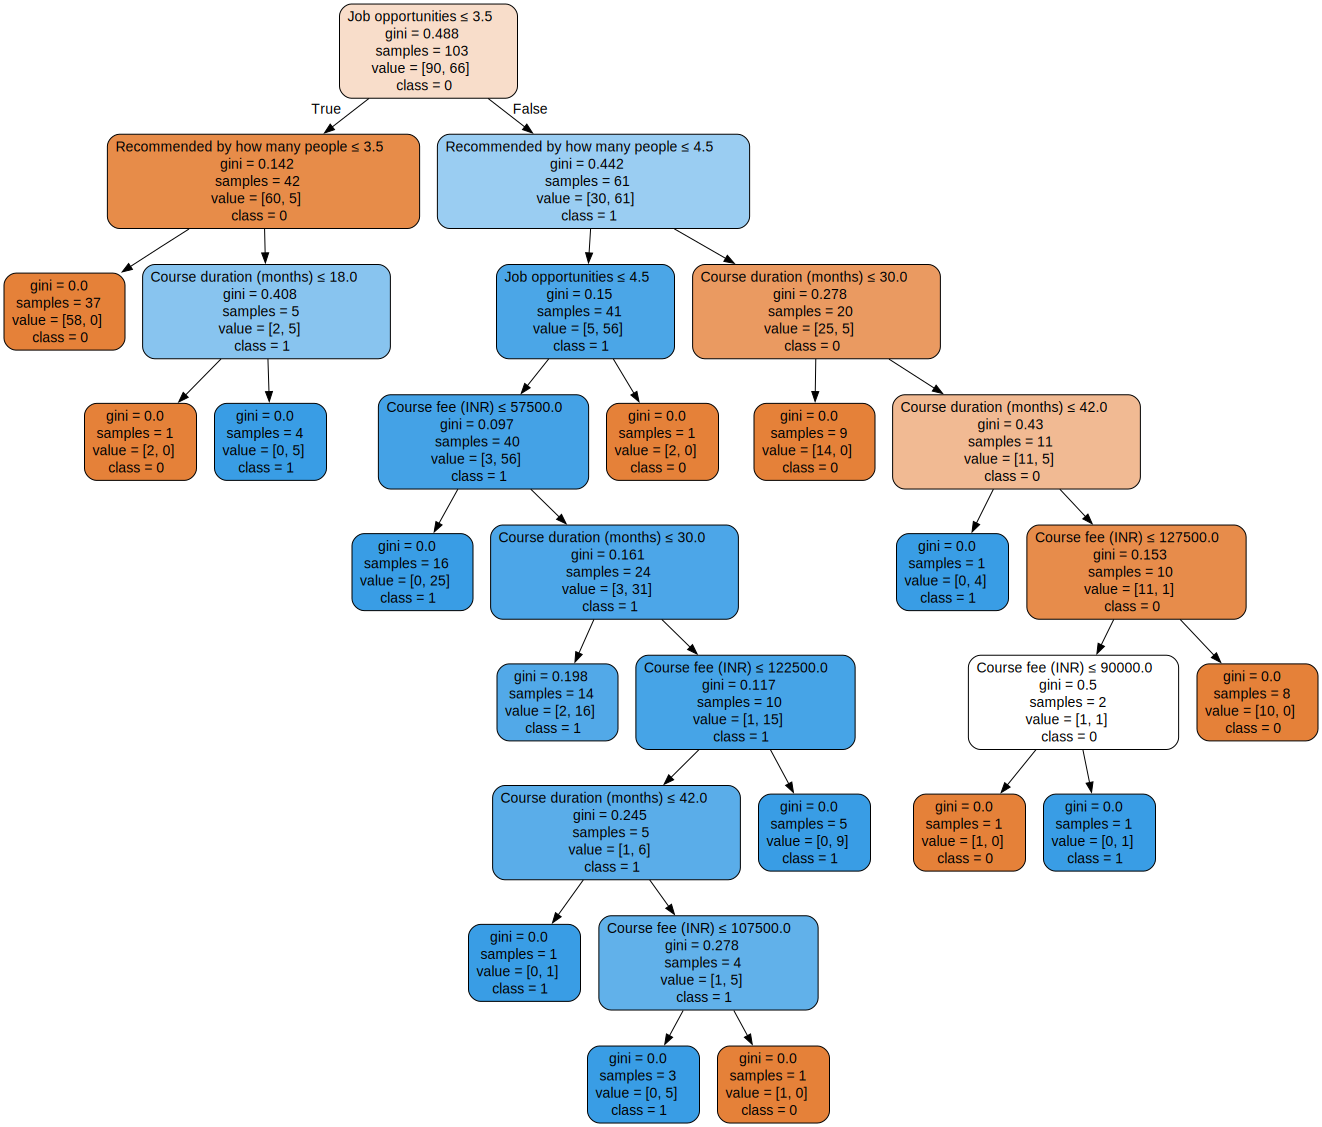


Decision Tree 5:


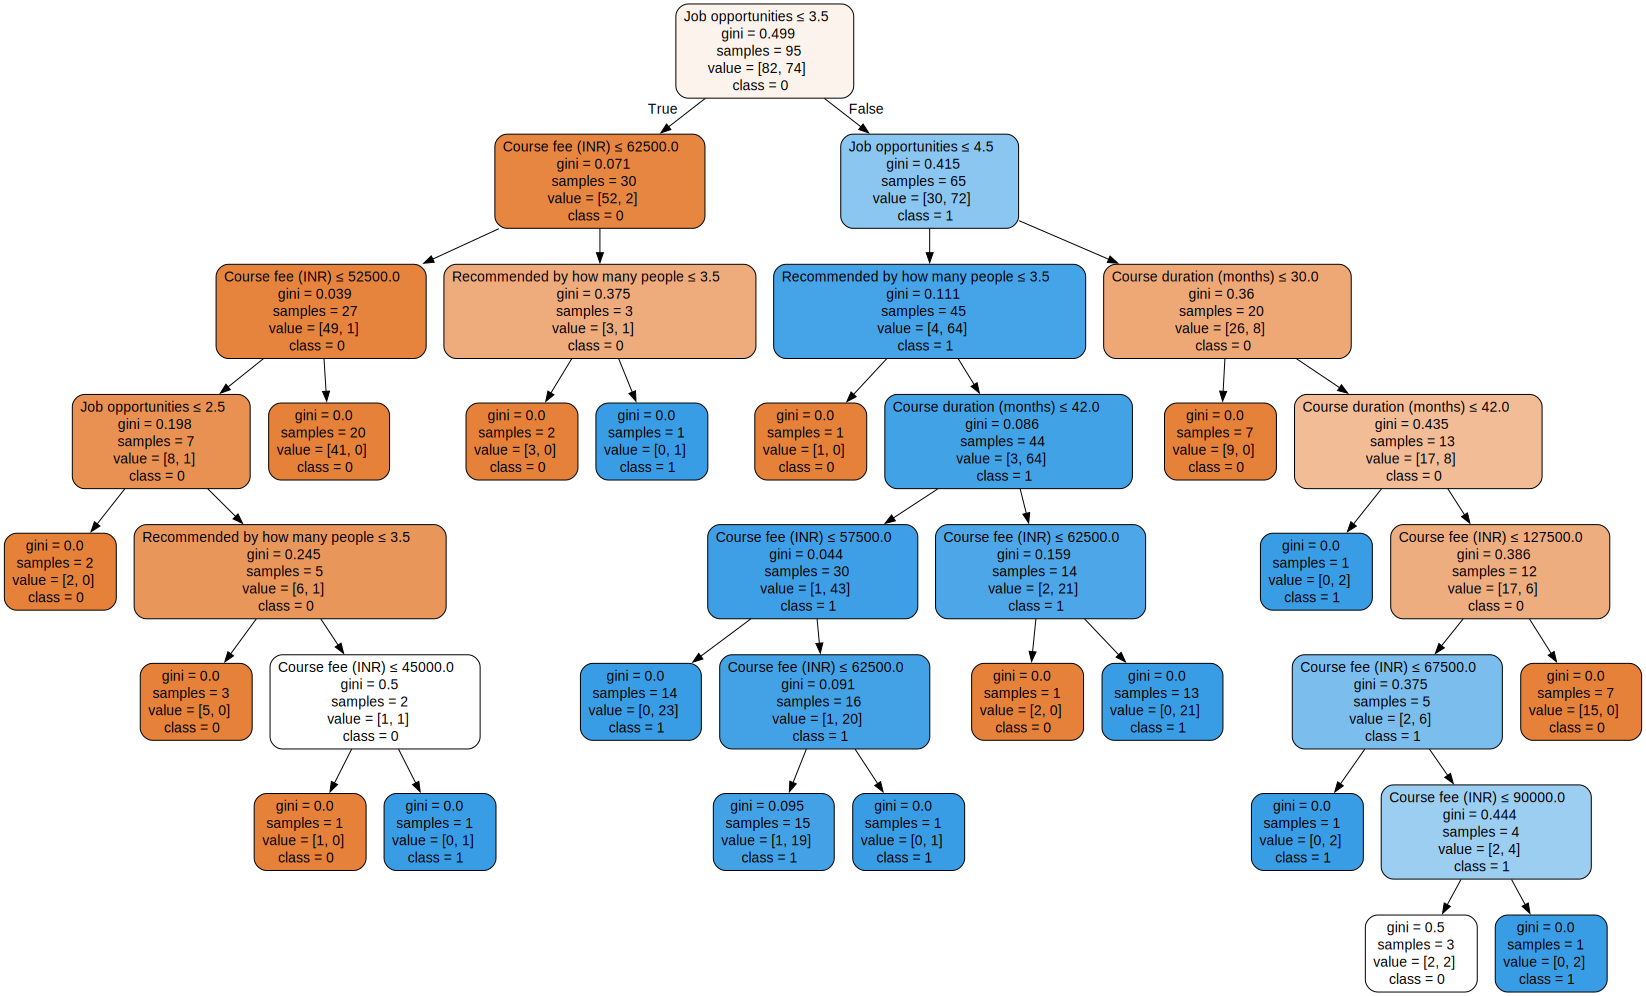

In [25]:
from sklearn.tree import export_graphviz
import graphviz

# Define a function to visualize a decision tree
def visualize_tree(tree, feature_names):
    dot_data = export_graphviz(tree, out_file=None, 
                                feature_names=feature_names,  
                                class_names=['0', '1'],  
                                filled=True, rounded=True,  
                                special_characters=True)
    return graphviz.Source(dot_data)

# Visualize the first 5 decision trees
for tree_idx, tree in enumerate(rf_clf.estimators_, start=1):
    if tree_idx > 5:
        break
    print(f"\nDecision Tree {tree_idx}:")
    tree_viz = visualize_tree(tree, X_train.columns)
    display(tree_viz)


## ADABOOST

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Step 13: Train an AdaBoost model with decision stumps
adaboost_clf = AdaBoostClassifier(n_estimators=10, learning_rate=1, random_state=0)
adaboost_clf.fit(X_train, y_train)

# Step 14: Predictions on the test set
adaboost_predictions = adaboost_clf.predict(X_test)

# Step 15: Accuracy of the model
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
print(f"\nAccuracy of AdaBoost: {adaboost_accuracy:.2f}")

# Step 16: Show predictions made by each stump for each sample
print("\nPredictions made by each stump for each sample:")
for sample_idx in range(len(X_test)):
    sample = X_test.iloc[sample_idx]
    actual_value = y_test.iloc[sample_idx]
    print(f"\nSample {sample_idx+1} - Actual: {actual_value}")
    for stump_idx, stump in enumerate(adaboost_clf.estimators_):
        stump_prediction = stump.predict([sample])[0]
        print(f"  Stump {stump_idx+1} - Prediction: {stump_prediction}")
    final_prediction = adaboost_predictions[sample_idx]
    print(f"Final Prediction: {final_prediction}")



Accuracy of AdaBoost: 0.78

Predictions made by each stump for each sample:

Sample 1 - Actual: 1
  Stump 1 - Prediction: 1
  Stump 2 - Prediction: 1
  Stump 3 - Prediction: 1
  Stump 4 - Prediction: 0
  Stump 5 - Prediction: 1
  Stump 6 - Prediction: 0
  Stump 7 - Prediction: 1
  Stump 8 - Prediction: 1
  Stump 9 - Prediction: 0
  Stump 10 - Prediction: 1
Final Prediction: 1

Sample 2 - Actual: 1
  Stump 1 - Prediction: 1
  Stump 2 - Prediction: 1
  Stump 3 - Prediction: 1
  Stump 4 - Prediction: 0
  Stump 5 - Prediction: 1
  Stump 6 - Prediction: 0
  Stump 7 - Prediction: 1
  Stump 8 - Prediction: 1
  Stump 9 - Prediction: 1
  Stump 10 - Prediction: 0
Final Prediction: 1

Sample 3 - Actual: 0
  Stump 1 - Prediction: 0
  Stump 2 - Prediction: 1
  Stump 3 - Prediction: 0
  Stump 4 - Prediction: 0
  Stump 5 - Prediction: 1
  Stump 6 - Prediction: 0
  Stump 7 - Prediction: 0
  Stump 8 - Prediction: 1
  Stump 9 - Prediction: 1
  Stump 10 - Prediction: 1
Final Prediction: 0

Sample 4 - Ac

## XGBoost

In [27]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Step 1: Train an XGBoost model
xgb_clf = xgb.XGBClassifier(n_estimators=4, learning_rate=0.1, random_state=0)
xgb_clf.fit(X_train, y_train)

# Step 2: Predictions on the test set
xgb_predictions = xgb_clf.predict(X_test)

# Step 3: Accuracy of the model
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"\nAccuracy of XGBoost: {xgb_accuracy:.2f}")


Accuracy of XGBoost: 0.78


In [28]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 2: Define a range of n_estimators values to search
n_estimators_range = [4,50, 100, 150, 200, 250]

# Step 3: Perform cross-validation to find the optimal n_estimators value
best_n_estimators = None
best_val_accuracy = 0

for n_estimators in n_estimators_range:
    # Train an XGBoost model
    xgb_clf = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=0.1, random_state=0)
    xgb_clf.fit(X_train, y_train)

    # Evaluate on the validation set
    val_predictions = xgb_clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)

    # Update the best n_estimators value if the current one is better
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_n_estimators = n_estimators

print(f"Optimal n_estimators: {best_n_estimators} (Validation Accuracy: {best_val_accuracy:.2f})")


Optimal n_estimators: 4 (Validation Accuracy: 0.78)
